In [ ]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras import models
from PIL import Image
from skimage.io import imread
import cv2

K.clear_session()

In [ ]:
img = plt.imread('033.jpg')
dims = np.shape(img)
matrix = np.reshape(img, (dims[0] * dims[1], dims[2]))
print(np.shape(matrix))

(680900, 3)


Image shape ->  (619, 1100)
Color channels ->  3
Min color depth : 0, Max color depth 255


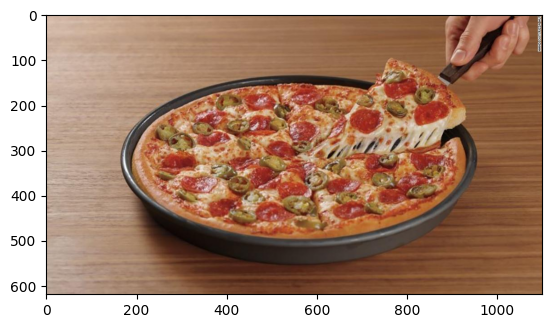

In [ ]:
plt.imshow(img)
print("Image shape -> ",dims[:2])
print("Color channels -> ",dims[2])
print("Min color depth : {}, Max color depth {}".format(np.min(img),np.max(img)))

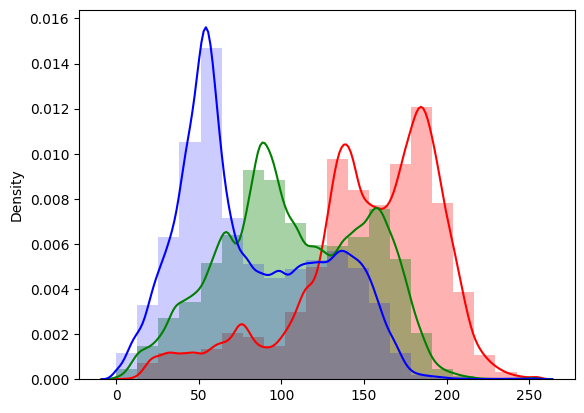

In [ ]:
sns.distplot(matrix[:,0], bins=20,color="red",hist_kws=dict(alpha=0.3))
sns.distplot(matrix[:,1], bins=20,color="green",hist_kws=dict(alpha=0.35))
sns.distplot(matrix[:,2], bins=20,color="blue",hist_kws=dict(alpha=0.2))
plt.show()

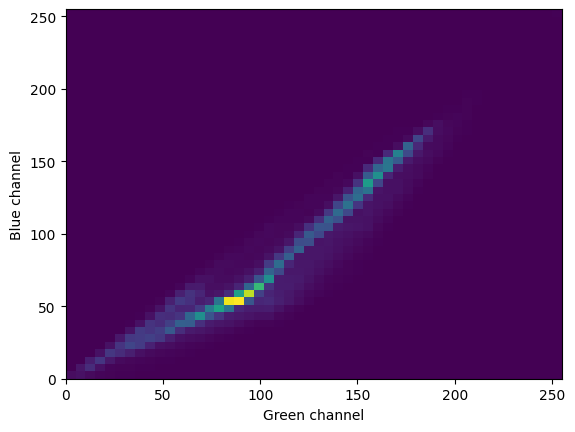

In [ ]:
_ = plt.hist2d(matrix[:,1], matrix[:,2], bins=(50,50))
plt.xlabel('Green channel')
plt.ylabel('Blue channel')
plt.show()

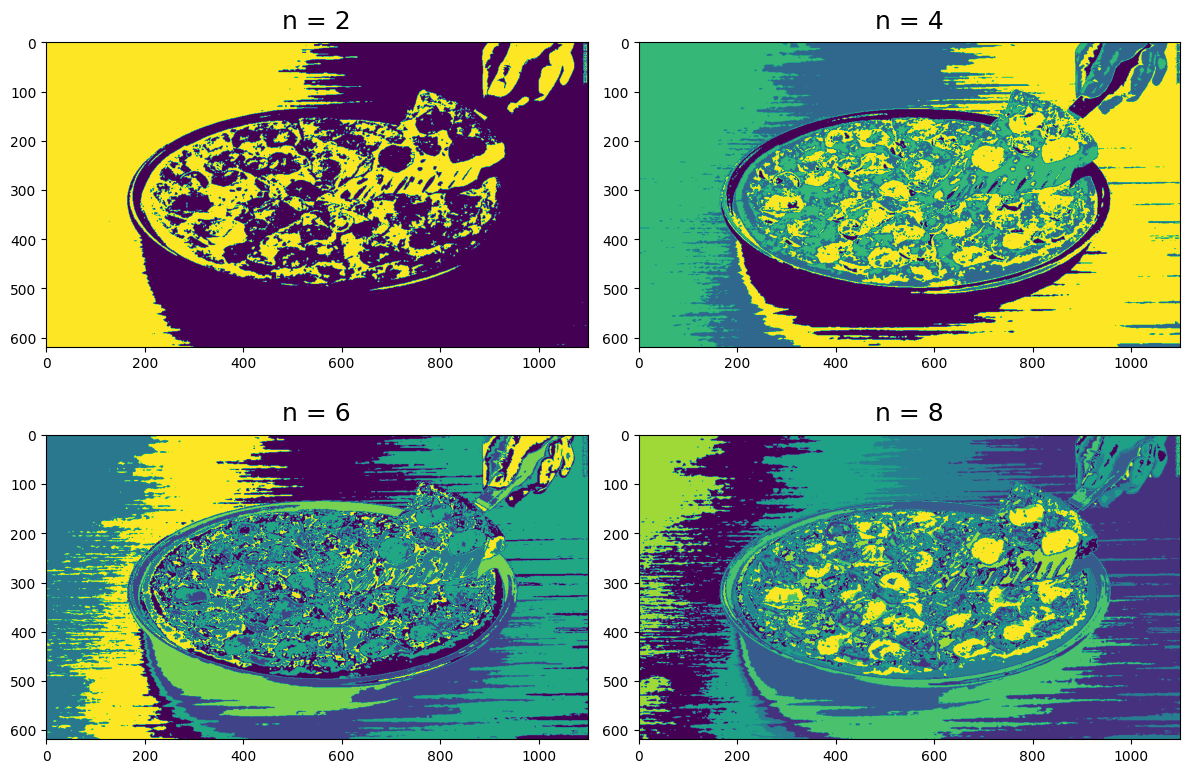

In [ ]:
from sklearn import cluster
n_vals=[2,4,6,8]
plt.figure(1, figsize=(12, 8))

for subplot,n in enumerate(n_vals):
    kmeans=cluster.KMeans(n)
    clustered = kmeans.fit_predict(matrix)
    dims = np.shape(img)
    clustered_img = np.reshape(clustered, (dims[0], dims[1]))
    plt.subplot(2,2, subplot+1)
    plt.title("n = {}".format(n), pad = 10,size=18)
    plt.imshow(clustered_img)

plt.tight_layout()

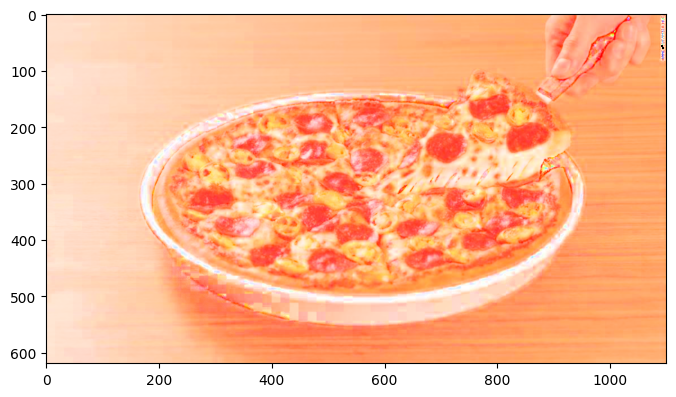

In [ ]:
bnorm = np.zeros_like(matrix, dtype=np.float32)
max_range = np.max(matrix, axis=1)
bnorm = matrix / np.vstack((max_range, max_range, max_range)).T
bnorm_img = np.reshape(bnorm, (dims[0],dims[1],dims[2]))
plt.figure(figsize=(8,10))
plt.imshow(bnorm_img)
plt.show()

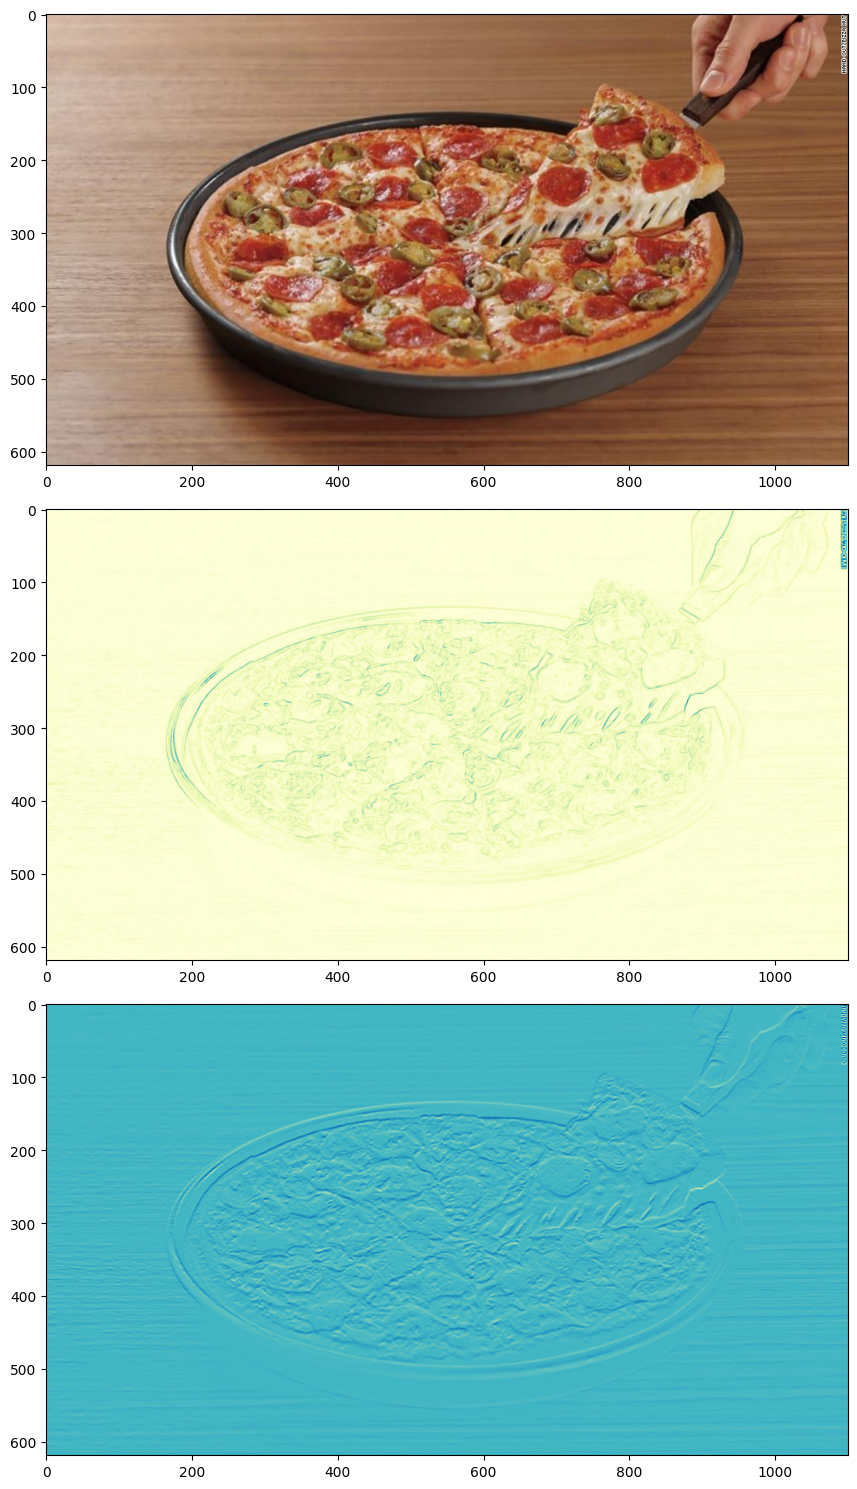

In [ ]:
import skimage
from skimage.feature import greycomatrix, greycoprops
from skimage.filters import sobel
from skimage.filters import sobel_h

plt.figure(1,figsize=(20,15))
cmap="YlGnBu"
plt.subplot(3,1,1)
plt.imshow(img)

plt.subplot(3,1,2)
plt.imshow(sobel(img[:,:,2]),cmap=cmap)

plt.subplot(3,1,3)
plt.imshow(sobel_h(img[:,:,1]), cmap=cmap)

plt.tight_layout()

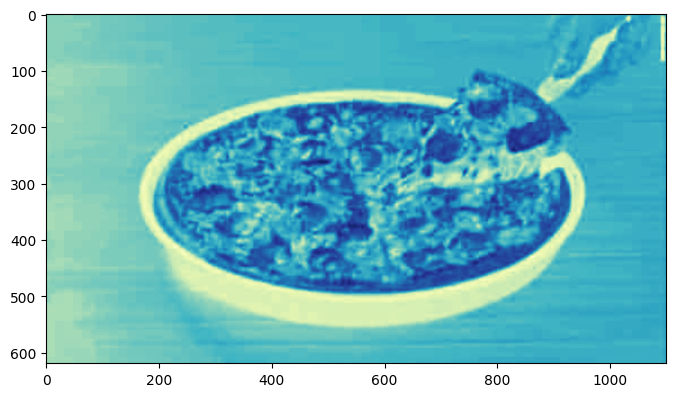

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(3)
pca.fit(matrix)
img_pca = pca.transform(matrix)
img_pca = np.reshape(img_pca, (dims[0], dims[1], dims[2]))

fig = plt.figure(figsize=(8, 8))
plt.imshow(img_pca[:,:,1], cmap=cmap)

In [ ]:
model.save('model_v1_inceptionV3.h5')

In [ ]:
K.clear_session()
path_to_model='./model_v1_inceptionV3.h5'
print("Loading the model..")
model = load_model(path_to_model)
print("Done!")

Loading the model..
Done!


In [ ]:
category={
    0: ['burger','Burger'], 1: ['butter_naan','Butter Naan'], 2: ['chai','Chai'],
    3: ['chapati','Chapati'], 4: ['chole_bhature','Chole Bhature'], 5: ['dal_makhani','Dal Makhani'],
    6: ['dhokla','Dhokla'], 7: ['fried_rice','Fried Rice'], 8: ['idli','Idli'], 9: ['jalegi','Jalebi'],
    10: ['kathi_rolls','Kaathi Rolls'], 11: ['kadai_paneer','Kadai Paneer'], 12: ['kulfi','Kulfi'],
    13: ['masala_dosa','Masala Dosa'], 14: ['momos','Momos'], 15: ['paani_puri','Paani Puri'],
    16: ['pakode','Pakode'], 17: ['pav_bhaji','Pav Bhaji'], 18: ['pizza','Pizza'], 19: ['samosa','Samosa']
}

def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(299, 299))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)

    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(category[index][1]))
    plt.imshow(img_array)

def predict_dir(filedir,model):
    cols=5
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1

    true=filedir.split('/')[-1]

    fig=plt.figure(1, figsize=(25, 25))

    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))

    for subplot,imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(299, 299))
        img_array = image.img_to_array(img_)

        img_processed = np.expand_dims(img_array, axis=0)

        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)

        pred=category.get(index)[0]
        if pred==true:
            pos+=1

        fig=plt.subplot(rows, cols, subplot+1)
        fig.set_title(category.get(index)[1], pad = 10,size=18)
        plt.imshow(img_array)

    acc=pos/total_images
    print("Accuracy of Test : {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images))
    plt.tight_layout()

1/1 [==============================] - 0s 225ms/step


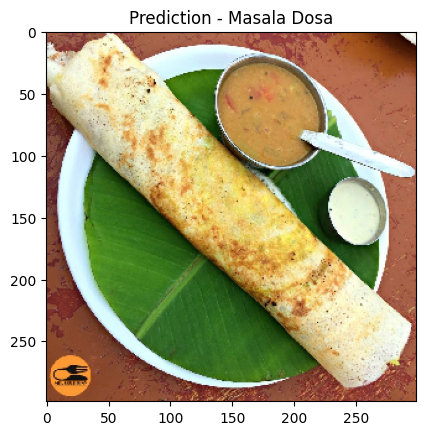

In [ ]:
predict_image('307.jpg',model)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
